In [1]:
# First, install the required packages, run the below for the first run
#!pip install numpy matplotlib seaborn pandas


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Changing working directory to whereever you hold your data
import os
print(os.getcwd())
os.chdir(r"C:\Users\chris\Downloads")
print(os.getcwd())

track_left = pd.read_csv("f1sim-ref-left.csv")
track_right = pd.read_csv("f1sim-ref-right.csv")
track_line = pd.read_csv("f1sim-ref-line.csv")
turns = pd.read_csv("f1sim-ref-turns.csv")

C:\Users\chris\Downloads
C:\Users\chris\Downloads


# Plotting the track

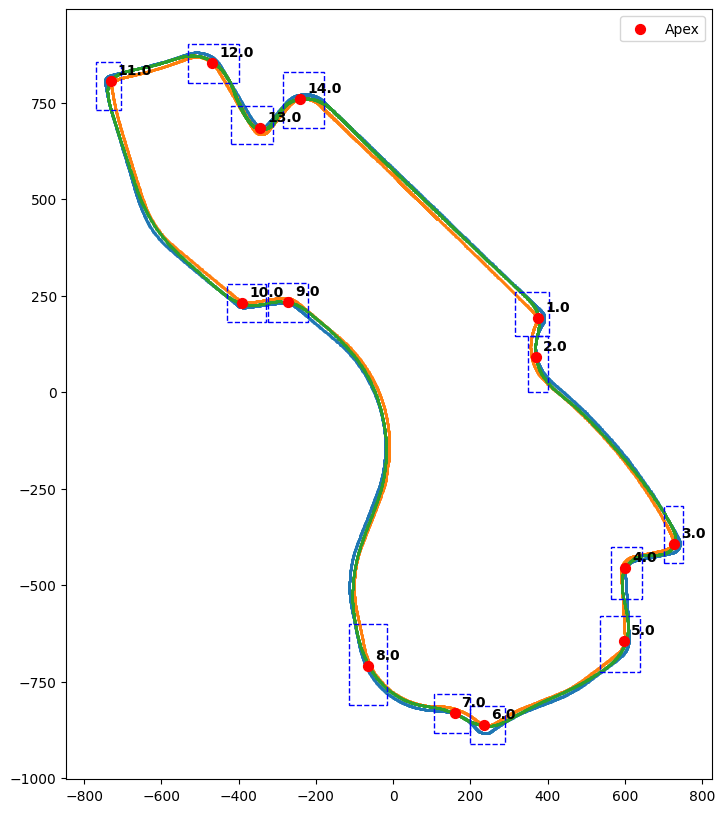

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(track_left["WORLDPOSX"], track_left["WORLDPOSY"], s=1)
ax.scatter(track_right["WORLDPOSX"], track_right["WORLDPOSY"], s=1)
ax.scatter(track_line["WORLDPOSX"], track_line["WORLDPOSY"], s=1)


# Plot apex dots
ax.scatter(turns["APEX_X1"], turns["APEX_Y1"], color="red", s=50, label="Apex")

# Draw boxes using corner coordinates
for _, row in turns.iterrows():
    x_min = min(row["CORNER_X1"], row["CORNER_X2"])
    x_max = max(row["CORNER_X1"], row["CORNER_X2"])
    y_min = min(row["CORNER_Y1"], row["CORNER_Y2"])
    y_max = max(row["CORNER_Y1"], row["CORNER_Y2"])

    # Rectangle patch
    rect = plt.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        fill=False,
        color="blue",
        linestyle="--"
    )
    ax.add_patch(rect)
    
    ax.annotate(str(row["TURN"]),
                (row["APEX_X1"], row["APEX_Y1"]),
                textcoords="offset points", xytext=(5, 5),
                color="black", fontsize=10, weight="bold")

# Formatting
ax.set_aspect("equal", "box")
ax.legend()
plt.show()



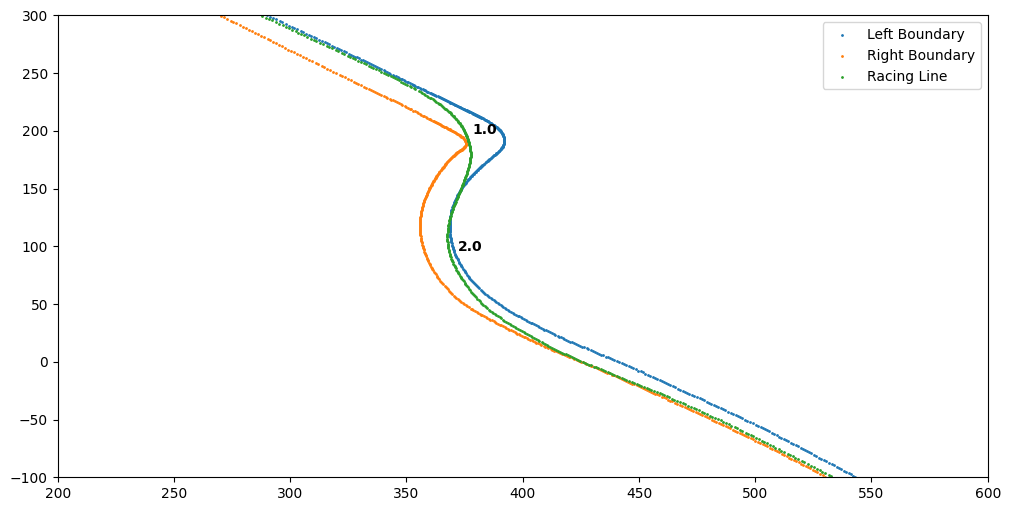

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(track_left["WORLDPOSX"], track_left["WORLDPOSY"], s=1, label="Left Boundary")
plt.scatter(track_right["WORLDPOSX"], track_right["WORLDPOSY"], s=1, label="Right Boundary")
plt.scatter(track_line["WORLDPOSX"], track_line["WORLDPOSY"], s=1, label="Racing Line")

plt.legend()

# Add turn annotations
for _, row in turns.iterrows():
    plt.annotate(str(row["TURN"]),
                (row["APEX_X1"], row["APEX_Y1"]),
                textcoords="offset points", xytext=(5, 5),
                color="black", fontsize=10, weight="bold")

# Set zoomed-in limits
plt.xlim(200, 600)  
plt.ylim(-100, 300)
plt.show()


In [5]:
# Changed Directory
data = pd.read_csv('UNSW F12024.csv')

C:\Users\chris\AppData\Local\Temp\ipykernel_2776\3484138504.py:2: DtypeWarning: Columns (70,71,73,74,82) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('UNSW F12024.csv')


## Sectioning The data by Track
We only care about the Melbourne track

In [6]:
track0_data = data[data['M_TRACKID'] == 0]

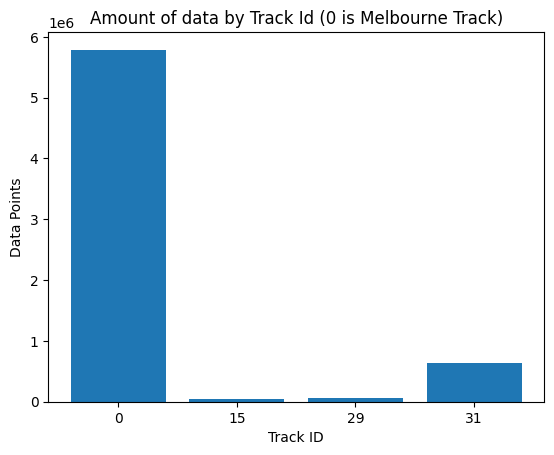

In [7]:
tracks = data.groupby("M_TRACKID").size()
plt.bar(x = tracks.index.astype(str), height = list(tracks.values))
plt.xlabel("Track ID")
plt.ylabel("Data Points")
plt.title("Amount of data by Track Id (0 is Melbourne Track)")
plt.show()

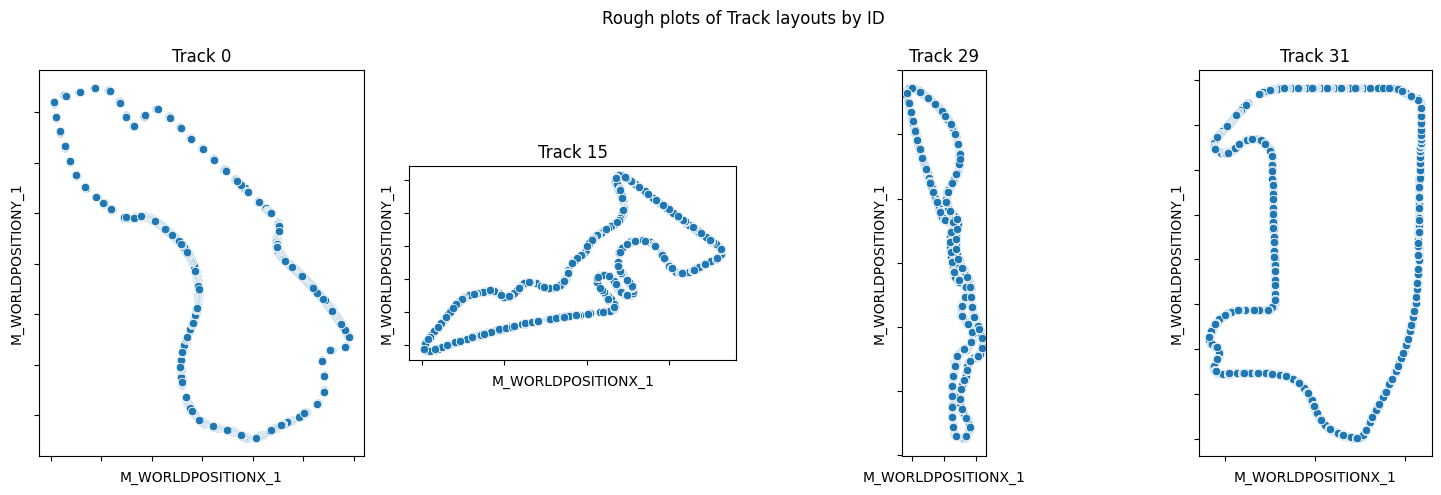

In [8]:
x_col="M_WORLDPOSITIONX_1" 
y_col="M_WORLDPOSITIONY_1"
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

track_ids = [0, 15, 29, 31]
for ax, tid in zip(axes, track_ids):
    if tid != 0:
        subset = data[data['M_TRACKID'] == tid].iloc[:5000]
    else: 
        subset = track0_data.iloc[:3000]
    sns.scatterplot(data=subset, x=x_col, y=y_col, ax=ax)
    ax.set_title(f"Track {tid}")
    ax.set_xticklabels([])  # hide x tick labels
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

plt.suptitle("Rough plots of Track layouts by ID")
plt.tight_layout()
plt.show()

## Sectioning the Data by Distance
Keeping only the data from laps where distance is less than 1200 as we are not focused on the other corners

In [9]:
run_data = track0_data[track0_data['M_LAPDISTANCE_1'] <= 1200]

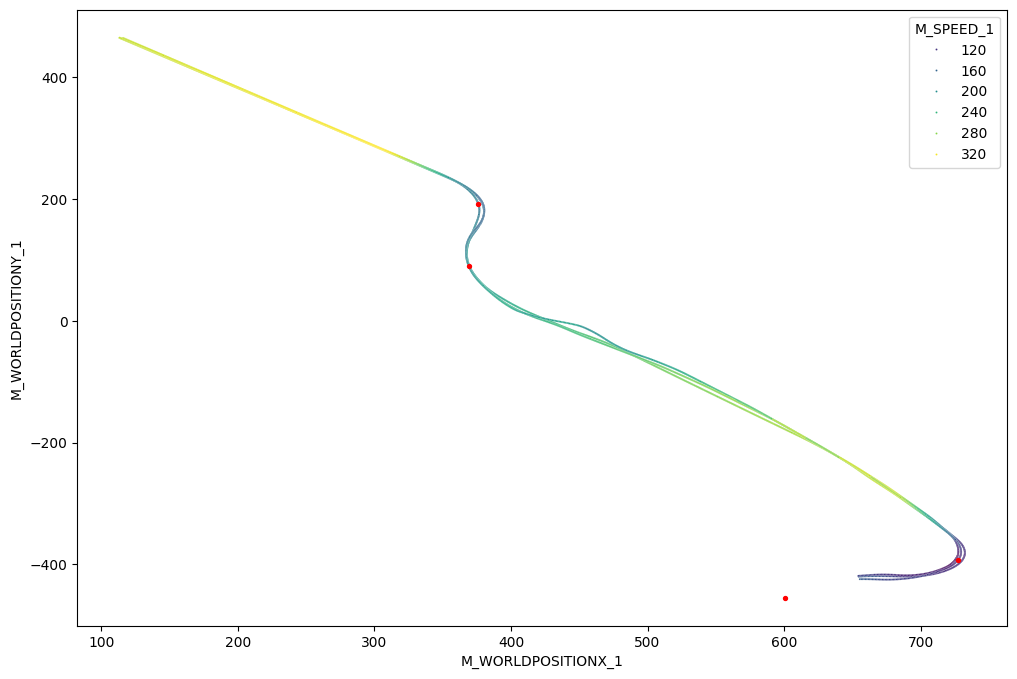

In [10]:
color_col="M_SPEED_1"

plt.figure(figsize=(12, 8))
sns.scatterplot(data=run_data[run_data["M_SESSIONUID"] == run_data.M_SESSIONUID.unique()[4]], x=x_col, y=y_col, hue=color_col, palette="viridis", s=2)
plt.scatter(turns["APEX_X1"][:4], turns["APEX_Y1"][:4], color="red", s=8, label="Apex")
plt.show()


# Track by rough distances

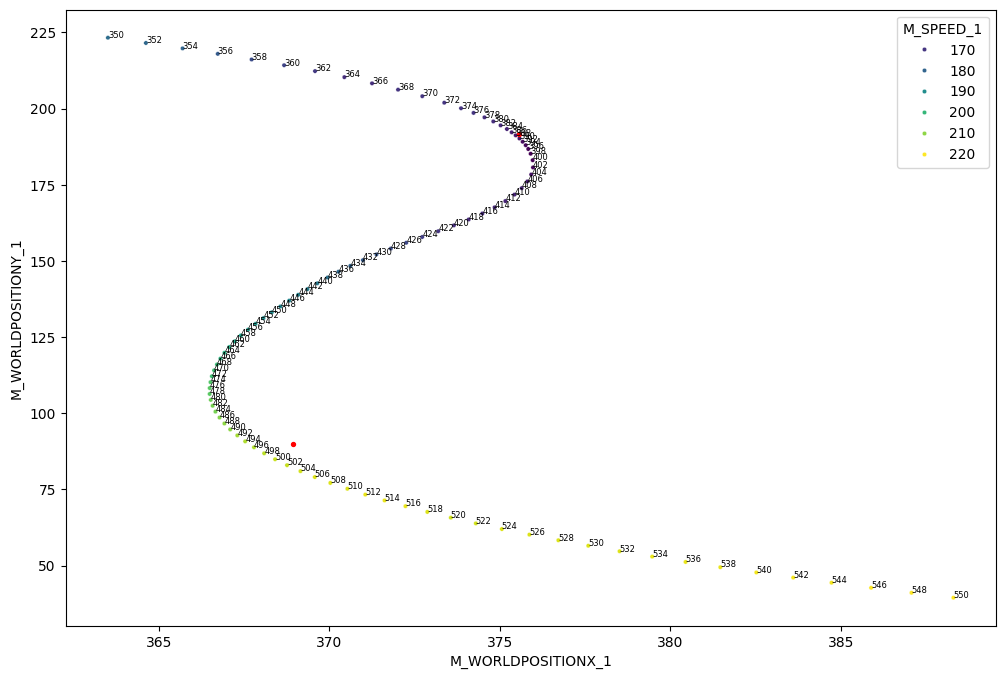

In [11]:
plt.figure(figsize=(12, 8))
sample = 2

plt_data = run_data[(run_data["M_SESSIONUID"] == run_data.M_SESSIONUID.unique()[2]) & (run_data["M_CURRENTLAPNUM"] == 1) & (
    run_data['M_LAPDISTANCE_1'] <= 550) & (run_data['M_LAPDISTANCE_1'] >= 350)].sort_values(by=["M_LAPDISTANCE_1"])

sns.scatterplot(data=plt_data.iloc[::sample], x=x_col,
                y=y_col, hue=color_col, palette="viridis", s=10)

for row in plt_data.iloc[::sample].itertuples():
    plt.text(getattr(row, x_col), getattr(row, y_col), str(
        getattr(row, "M_LAPDISTANCE_1")), fontsize=6)

plt.scatter(turns["APEX_X1"][:2], turns["APEX_Y1"]
            [:2], color="red", s=8, label="Apex")
plt.show()

In [12]:
lap_1_data = run_data[run_data["M_CURRENTLAPNUM"] == 1]
lap_n_data = run_data[run_data["M_CURRENTLAPNUM"] > 1]
# lap_1_data.to_csv("data/lap-1.csv", index=False)
# lap_n_data.to_csv("data/lap-n.csv", index=False)

# Lap time Disp

Lap time distributions

(If someone has time maybe look why some of the times on the >1 laps are 0)

In [13]:
percent = 75

lap1_times = (
    lap_1_data[lap_1_data["M_LAPDISTANCE_1"] >= 1100]
    .groupby(["M_SESSIONUID", "M_CURRENTLAPNUM"])["M_CURRENTLAPTIMEINMS_1"]
    .min()
)
lapn_times = (
    lap_n_data[lap_n_data["M_LAPDISTANCE_1"] >= 1100]
    .groupby(["M_SESSIONUID", "M_CURRENTLAPNUM"])["M_CURRENTLAPTIMEINMS_1"]
    .min()
)

lap1_cutoff = np.percentile(lap1_times, percent)
lapn_cutoff = np.percentile(lapn_times[lapn_times != 0], percent)

lap1_fast = lap1_times[lap1_times <= lap1_cutoff].reset_index()[["M_SESSIONUID","M_CURRENTLAPNUM"]]
lapn_fast = lapn_times[(lapn_times != 0) & (lapn_times <= lapn_cutoff)].reset_index()[["M_SESSIONUID","M_CURRENTLAPNUM"]] ## Remove the 0 times, but WHYYYYY???

lap_1_cut = lap_1_data.merge(lap1_fast, on=["M_SESSIONUID", "M_CURRENTLAPNUM"])
lap_n_cut = lap_n_data.merge(lapn_fast, on=["M_SESSIONUID", "M_CURRENTLAPNUM"])

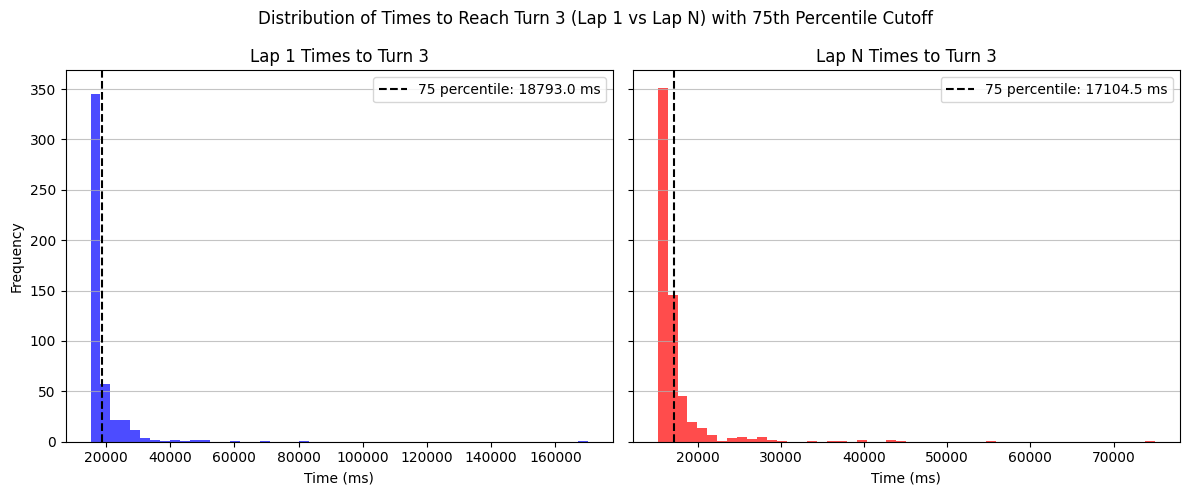

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(lap1_times, bins=50, color='blue', alpha=0.7)
axes[0].set_title("Lap 1 Times to Turn 3")
axes[0].set_xlabel("Time (ms)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', alpha=0.75)
axes[0].axvline(lap1_cutoff, color='black', linestyle='--', label=f'{percent} percentile: {lap1_cutoff} ms')
axes[0].legend()

axes[1].hist(lapn_times[lapn_times != 0], bins=50, color='red', alpha=0.7) # Remove the 0 times PLS CHECK WHY
axes[1].set_title("Lap N Times to Turn 3")
axes[1].set_xlabel("Time (ms)")
axes[1].grid(axis='y', alpha=0.75)
axes[1].axvline(lapn_cutoff, color='black', linestyle='--', label=f'{percent} percentile: {lapn_cutoff} ms')
axes[1].legend()

plt.suptitle(f"Distribution of Times to Reach Turn 3 (Lap 1 vs Lap N) with {percent}th Percentile Cutoff")
plt.tight_layout()
plt.show()

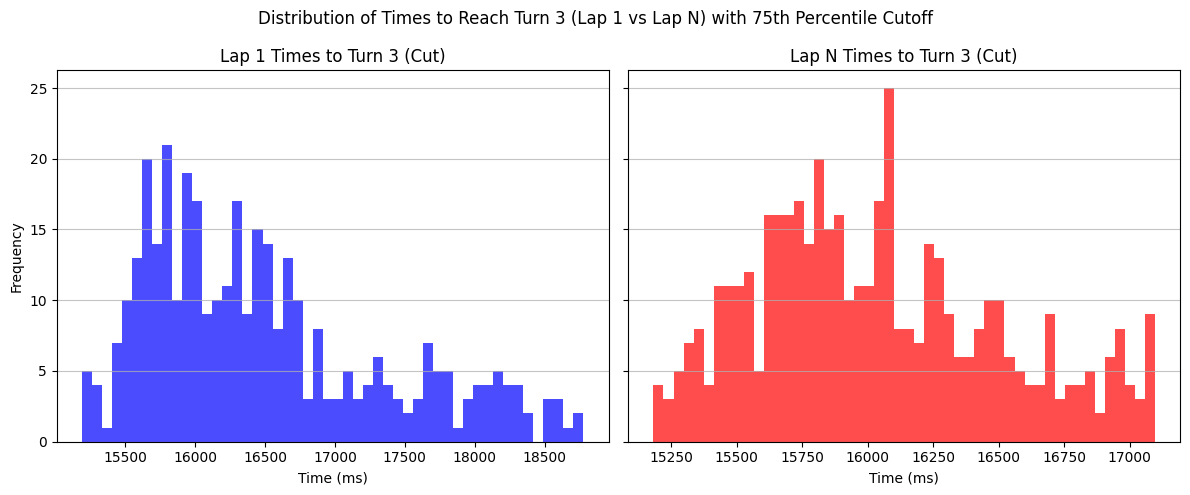

In [15]:
lap1_cut = lap1_times[lap1_times <= lap1_cutoff]
lapn_cut = lapn_times[lapn_times <= lapn_cutoff]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].hist(lap1_cut, bins=50, color='blue', alpha=0.7)
axes[0].set_title("Lap 1 Times to Turn 3 (Cut)")
axes[0].set_xlabel("Time (ms)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', alpha=0.75)

# Lap N Times Histogram after cut
axes[1].hist(lapn_cut[lapn_cut != 0], bins=50, color='red', alpha=0.7)
axes[1].set_title("Lap N Times to Turn 3 (Cut)")
axes[1].set_xlabel("Time (ms)")
axes[1].grid(axis='y', alpha=0.75)

plt.suptitle(f"Distribution of Times to Reach Turn 3 (Lap 1 vs Lap N) with {percent}th Percentile Cutoff")
plt.tight_layout()
plt.show()


## Quesitons to ask (we should justify all for the report):
1. what percentile should we be using
2. should we be using std over percentile
3. should the percentile be n% of the combined or seperate
4. where to call the point to time do (currently 1100m)
5. if this is good / not good - I wont take any offence so dw, just looking for a good mark lol

# Turn to distance plot 

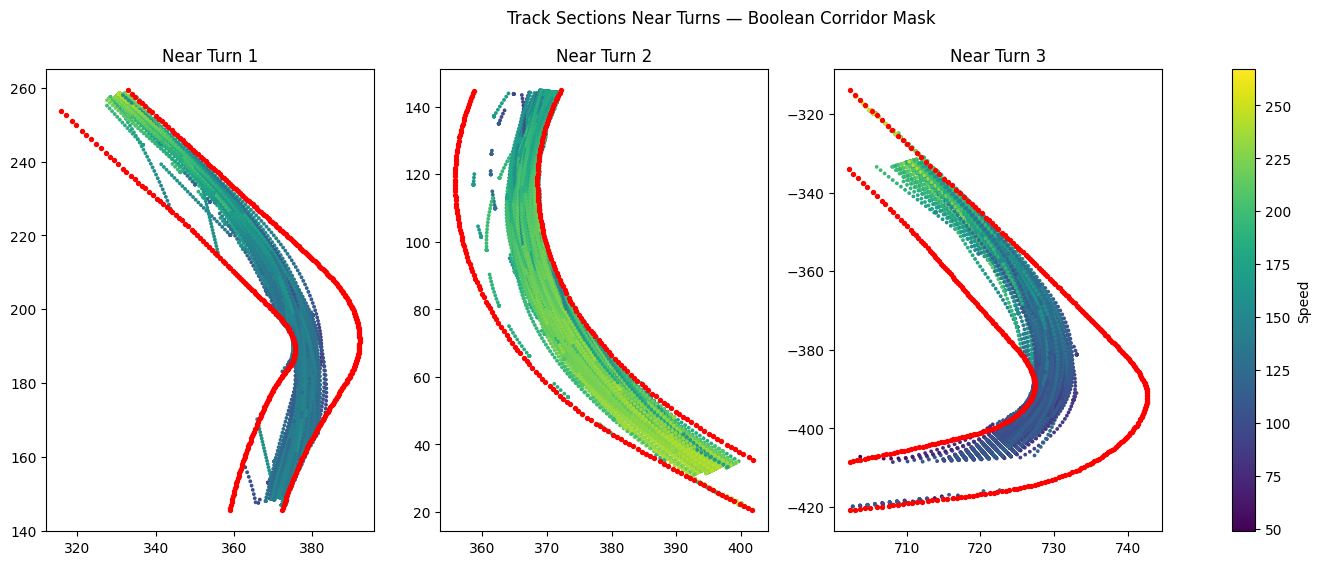

In [16]:
#import numpy as np
from numpy.linalg import svd

# --- helpers ---
def pca_frame(xy):
    """Return origin (mean) and 2x2 rotation matrix whose first axis follows the turn."""
    mu = xy.mean(axis=0)
    X = xy - mu
    # SVD gives principal directions; Vt.T columns are orthonormal axes
    _, _, Vt = svd(X, full_matrices=False)
    R = Vt.T  # columns: e1 (along-track), e2 (cross-track)
    return mu, R

def to_local(xy, mu, R):
    """Global XY -> local UV (u=along, v=across)."""
    return (xy - mu) @ R

def corridor_bounds(edge_uv, nbins=60, v_pad=0.05):
    """
    Build upper/lower v-bounds as a function of u using binning + interpolation.
    Returns (u_mid, v_lo(u), v_hi(u)).
    """
    u = edge_uv[:, 0]
    v = edge_uv[:, 1]

    # Bin by u
    bins = np.linspace(u.min(), u.max(), nbins + 1)
    u_mid = 0.5 * (bins[:-1] + bins[1:])
    idx = np.clip(np.digitize(u, bins) - 1, 0, nbins - 1)

    v_lo = np.full(nbins, np.nan)
    v_hi = np.full(nbins, np.nan)
    for b in range(nbins):
        m = (idx == b)
        if m.any():
            v_lo[b] = v[m].min() - v_pad
            v_hi[b] = v[m].max() + v_pad

    # Interpolate gaps (if any) to keep it fully boolean-friendly
    valid = ~np.isnan(v_lo)
    if valid.sum() >= 2:
        v_lo = np.interp(u_mid, u_mid[valid], v_lo[valid])
        v_hi = np.interp(u_mid, u_mid[valid], v_hi[valid])
    else:
        # Fallback to a constant band if too sparse
        v_lo[:] = np.nanmin(v_lo)
        v_hi[:] = np.nanmax(v_hi)

    return u_mid, v_lo, v_hi

# --- plotting with boolean mask ---
t = 3
fig, axs = plt.subplots(1, t, figsize=(18, 6))

### Removing currentlapinvalid = 1 laps
def filter_valid_laps(df):
    # find the column even if named slightly differently
    cand = [c for c in df.columns if "CURRENTLAPINVALID" in c.upper()]
    if not cand:
        print("⚠️ No CURRENTLAPINVALID column found; dataset left unchanged.")
        return df
    flag_col = cand[0]
    # coerce to 0/1 and keep only valid (==0)
    flag = (
        df[flag_col]
        .astype(str).str.strip().str.lower()
        .map({"1": 1, "0": 0, "true": 1, "false": 0, "t": 1, "f": 0, "yes": 1, "no": 0})
        .fillna(0).astype(int)
    )
    return df[flag == 0].copy()

# apply before concatenation
lap_1_cut = filter_valid_laps(lap_1_cut)
lap_n_cut = filter_valid_laps(lap_n_cut)

# rebuild working set from valid laps only
run_data_cut = pd.concat([lap_1_cut, lap_n_cut], ignore_index=True)

###

for i in range(t):
    turn_n = turns.iloc[i]

    x_min = min(turn_n["CORNER_X1"], turn_n["CORNER_X2"])
    x_max = max(turn_n["CORNER_X1"], turn_n["CORNER_X2"])
    y_min = min(turn_n["CORNER_Y1"], turn_n["CORNER_Y2"])
    y_max = max(turn_n["CORNER_Y1"], turn_n["CORNER_Y2"])

    # 1) Cheap prefilter by bbox
    near_turn_n = run_data_cut[
        (run_data_cut[x_col] >= x_min) & (run_data_cut[x_col] <= x_max) &
        (run_data_cut[y_col] >= y_min) & (run_data_cut[y_col] <= y_max)
    ].copy()

    tl_t2 = track_left[
        (track_left["WORLDPOSX"] >= x_min) & (track_left["WORLDPOSX"] <= x_max) &
        (track_left["WORLDPOSY"] >= y_min) & (track_left["WORLDPOSY"] <= y_max)
    ]
    tr_t2 = track_right[
        (track_right["WORLDPOSX"] >= x_min) & (track_right["WORLDPOSX"] <= x_max) &
        (track_right["WORLDPOSY"] >= y_min) & (track_right["WORLDPOSY"] <= y_max)
    ]

    # If not enough edge points, keep the bbox result
    if len(tl_t2) >= 3 and len(tr_t2) >= 3 and len(near_turn_n) > 0:
        # 2) Build a local (u,v) frame aligned with the turn using left+right edges
        edges_xy = np.vstack([
            tl_t2[["WORLDPOSX", "WORLDPOSY"]].to_numpy(),
            tr_t2[["WORLDPOSX", "WORLDPOSY"]].to_numpy()
        ])
        mu, R = pca_frame(edges_xy)

        # 3) Compute boolean bounds v_lo(u) <= v <= v_hi(u)
        edge_uv = to_local(edges_xy, mu, R)
        u_mid, v_lo, v_hi = corridor_bounds(edge_uv, nbins=60, v_pad=0.05)

        # 4) Transform run points and apply purely boolean mask
        pts_xy = near_turn_n[[x_col, y_col]].to_numpy()
        pts_uv = to_local(pts_xy, mu, R)
        u_pts = pts_uv[:, 0]
        v_pts = pts_uv[:, 1]

        # Interpolate the v-bounds at each point's u
        v_lo_at_u = np.interp(u_pts, u_mid, v_lo)
        v_hi_at_u = np.interp(u_pts, u_mid, v_hi)

        # Optional: restrict u to the span of the edges to avoid fringe artefacts
        u_min, u_max = u_mid.min(), u_mid.max()
        inside_mask = (u_pts >= u_min) & (u_pts <= u_max) & (v_pts >= v_lo_at_u) & (v_pts <= v_hi_at_u)

        # Apply the boolean mask
        near_turn_n = near_turn_n.loc[inside_mask]

    # Plot filtered points
    scatter = axs[i].scatter(
        near_turn_n[x_col], near_turn_n[y_col],
        c=near_turn_n["M_SPEED_1"], cmap="viridis", s=3
    )

    # Plot edges for reference
    axs[i].scatter(tl_t2["WORLDPOSX"], tl_t2["WORLDPOSY"], s=8, color="red")
    axs[i].scatter(tr_t2["WORLDPOSX"], tr_t2["WORLDPOSY"], s=8, color="red")
    axs[i].set_title(f"Near Turn {i + 1}")

fig.colorbar(scatter, ax=axs, orientation='vertical', label="Speed")
plt.suptitle("Track Sections Near Turns — Boolean Corridor Mask")
plt.show()

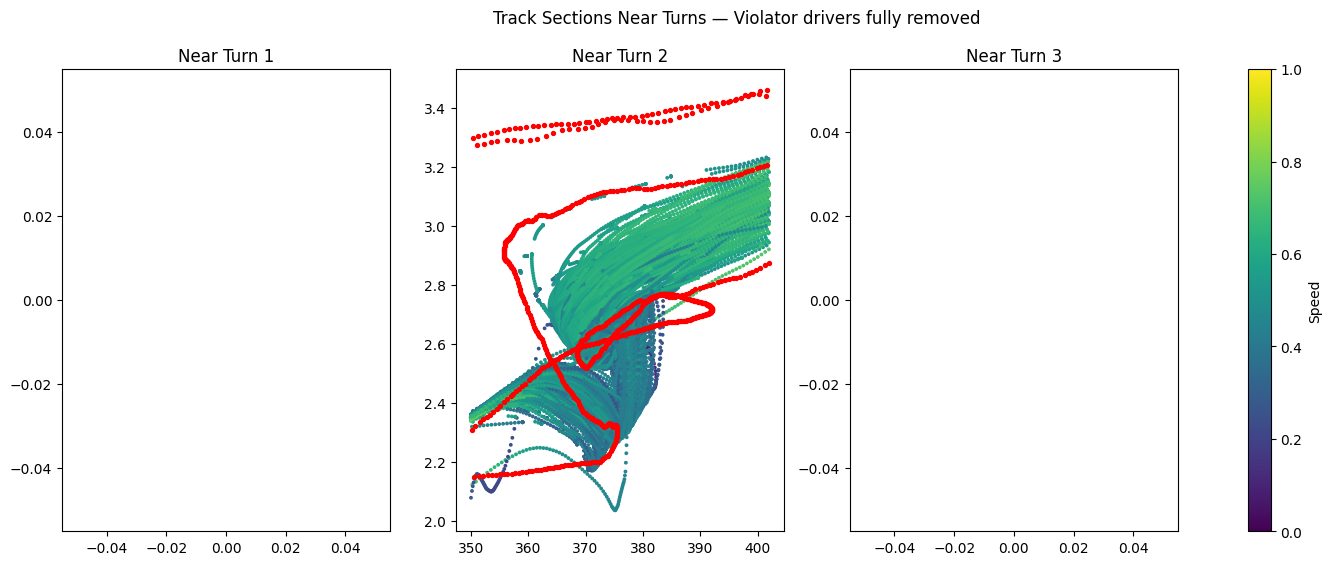

In [17]:
## HELP
## ... i dont think this bit works

import numpy as np
from numpy.linalg import svd

def pca_frame(xy):
    mu = xy.mean(axis=0)
    X = xy - mu
    _, _, Vt = svd(X, full_matrices=False)
    return mu, Vt.T

def to_local(xy, mu, R):
    return (xy - mu) @ R

# --- run points (per data dictionary) ---
x_col = "M_WORLDPOSITIONX_1"
y_col = "M_WORLDPOSITIONZ_1"

# --- track edges on the same plane ---
edge_x_col = "WORLDPOSX"
edge_y_col = "WORLDPOSZ" if "WORLDPOSZ" in track_left.columns else "WORLDPOSY"

# --- robust corridor (no v_pad arg) ---
def corridor_bounds(edge_uv, nbins=60, q_lo=0.01, q_hi=0.99, pad_frac=0.12, pad_floor=0.6):
    u = edge_uv[:, 0]; v = edge_uv[:, 1]
    bins = np.linspace(u.min(), u.max(), nbins + 1)
    u_mid = 0.5 * (bins[:-1] + bins[1:])
    idx = np.clip(np.digitize(u, bins) - 1, 0, nbins - 1)

    v_lo_q = np.full(nbins, np.nan); v_hi_q = np.full(nbins, np.nan)
    for b in range(nbins):
        m = (idx == b)
        if m.any():
            vb = v[m]
            v_lo_q[b] = np.quantile(vb, q_lo)
            v_hi_q[b] = np.quantile(vb, q_hi)

    valid = ~np.isnan(v_lo_q)
    if valid.sum() >= 2:
        v_lo_q = np.interp(u_mid, u_mid[valid], v_lo_q[valid])
        v_hi_q = np.interp(u_mid, u_mid[valid], v_hi_q[valid])
    else:
        v_lo_q[:] = np.nanmin(v_lo_q); v_hi_q[:] = np.nanmax(v_hi_q)

    widths = v_hi_q - v_lo_q
    v_pad = max(pad_floor, pad_frac * float(np.nanmedian(widths)))
    return u_mid, (v_lo_q - v_pad), (v_hi_q + v_pad)

# =========================
# PASS 1: find violators
# =========================
t = 3
violators = set()
run_data_cut = pd.concat([lap_1_cut, lap_n_cut]).copy()

_possible_driver_cols = ["R_NAME","DEVICENAME","DRIVER","DRIVER_ID","RACINGNUMBER","CAR_ID","PLAYER","RACER"]
driver_col = next((c for c in _possible_driver_cols if c in run_data_cut.columns), None)
if driver_col is None:
    raise ValueError("Set driver_col manually.")

for i in range(t):
    trn = turns.iloc[i]
    x_min, x_max = sorted([trn["CORNER_X1"], trn["CORNER_X2"]])
    y_min, y_max = sorted([trn["CORNER_Y1"], trn["CORNER_Y2"]])

    near = run_data_cut[
        (run_data_cut[x_col] >= x_min) & (run_data_cut[x_col] <= x_max) &
        (run_data_cut[y_col] >= y_min) & (run_data_cut[y_col] <= y_max)
    ]
    if near.empty:
        continue

    tl = track_left[
        (track_left[edge_x_col] >= x_min) & (track_left[edge_x_col] <= x_max) &
        (track_left[edge_y_col] >= y_min) & (track_left[edge_y_col] <= y_max)
    ]
    tr = track_right[
        (track_right[edge_x_col] >= x_min) & (track_right[edge_x_col] <= x_max) &
        (track_right[edge_y_col] >= y_min) & (track_right[edge_y_col] <= y_max)
    ]
    if len(tl) < 3 or len(tr) < 3:
        continue

    edges_xy = np.vstack([tl[[edge_x_col, edge_y_col]].to_numpy(),
                          tr[[edge_x_col, edge_y_col]].to_numpy()])
    mu, R = pca_frame(edges_xy)
    edge_uv = to_local(edges_xy, mu, R)
    u_mid, v_lo, v_hi = corridor_bounds(edge_uv, nbins=60)  # <-- removed v_pad

    pts_uv = to_local(near[[x_col, y_col]].to_numpy(), mu, R)
    u_pts, v_pts = pts_uv[:, 0], pts_uv[:, 1]

    umin, umax = u_mid.min(), u_mid.max()
    in_span = (u_pts >= umin) & (u_pts <= umax)
    if not in_span.any():
        continue

    v_lo_at = np.interp(u_pts[in_span], u_mid, v_lo)
    v_hi_at = np.interp(u_pts[in_span], u_mid, v_hi)
    outside = (v_pts[in_span] < v_lo_at) | (v_pts[in_span] > v_hi_at)
    if outside.any():
        violators.update(near.loc[in_span].loc[outside, driver_col].unique().tolist())

# drop all rows for violators
if violators:
    run_data_cut = run_data_cut[~run_data_cut[driver_col].isin(violators)].copy()

# =========================
# PASS 2: plot clean drivers
# =========================
fig, axs = plt.subplots(1, t, figsize=(18, 6))
for i in range(t):
    trn = turns.iloc[i]
    x_min, x_max = sorted([trn["CORNER_X1"], trn["CORNER_X2"]])
    y_min, y_max = sorted([trn["CORNER_Y1"], trn["CORNER_Y2"]])

    near = run_data_cut[
        (run_data_cut[x_col] >= x_min) & (run_data_cut[x_col] <= x_max) &
        (run_data_cut[y_col] >= y_min) & (run_data_cut[y_col] <= y_max)
    ]

    tl = track_left[
        (track_left[edge_x_col] >= x_min) & (track_left[edge_x_col] <= x_max) &
        (track_left[edge_y_col] >= y_min) & (track_left[edge_y_col] <= y_max)
    ]
    tr = track_right[
        (track_right[edge_x_col] >= x_min) & (track_right[edge_x_col] <= x_max) &
        (track_right[edge_y_col] >= y_min) & (track_right[edge_y_col] <= y_max)
    ]

    axs[i].scatter(near[x_col], near[y_col], c=near["M_SPEED_1"], cmap="viridis", s=3)
    axs[i].scatter(tl[edge_x_col], tl[edge_y_col], s=8, color="red")
    axs[i].scatter(tr[edge_x_col], tr[edge_y_col], s=8, color="red")
    axs[i].set_title(f"Near Turn {i+1}")

cbar = fig.colorbar(axs[0].collections[0], ax=axs, orientation='vertical', label="Speed")
plt.suptitle("Track Sections Near Turns — Violator drivers fully removed")
plt.show()

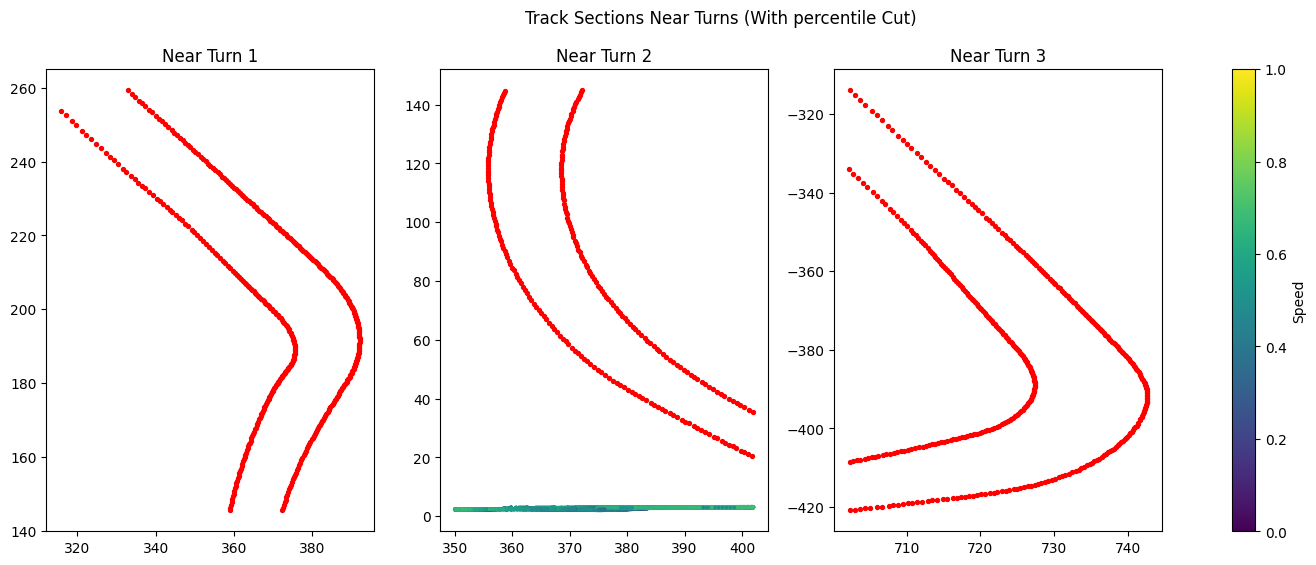

In [18]:
t = 3
fig, axs = plt.subplots(1, t, figsize=(18, 6))
run_data_cut = pd.concat([lap_1_cut, lap_n_cut])

for i in range(t):
    turn_n = turns.iloc[i]

    x_min = min(turn_n["CORNER_X1"], turn_n["CORNER_X2"])
    x_max = max(turn_n["CORNER_X1"], turn_n["CORNER_X2"])
    y_min = min(turn_n["CORNER_Y1"], turn_n["CORNER_Y2"])
    y_max = max(turn_n["CORNER_Y1"], turn_n["CORNER_Y2"])

    near_turn_n = run_data_cut[(run_data_cut[x_col] >= x_min) & (run_data_cut[x_col] <= x_max) & 
                           (run_data_cut[y_col] >= y_min) & (run_data_cut[y_col] <= y_max)]

    tl_t2 = track_left[(track_left["WORLDPOSX"] >= x_min) & (track_left["WORLDPOSX"] <= x_max) & 
                       (track_left["WORLDPOSY"] >= y_min) & (track_left["WORLDPOSY"] <= y_max)]
    tr_t2 = track_right[(track_right["WORLDPOSX"] >= x_min) & (track_right["WORLDPOSX"] <= x_max) & 
                        (track_right["WORLDPOSY"] >= y_min) & (track_right["WORLDPOSY"] <= y_max)]

    scatter = axs[i].scatter(near_turn_n[x_col], near_turn_n[y_col], 
                             c=near_turn_n["M_SPEED_1"], cmap="viridis", s=3)

    # cbar = plt.colorbar(scatter, ax=axs[i])
    # cbar.set_label("Speed") 

    axs[i].scatter(tl_t2["WORLDPOSX"], tl_t2["WORLDPOSY"], s=8, color="red")
    axs[i].scatter(tr_t2["WORLDPOSX"], tr_t2["WORLDPOSY"], s=8, color="red")
    axs[i].set_title(f"Near Turn {i + 1}")

fig.colorbar(scatter, ax=axs, orientation='vertical', label="Speed") 
plt.suptitle("Track Sections Near Turns (With percentile Cut)")
plt.show()

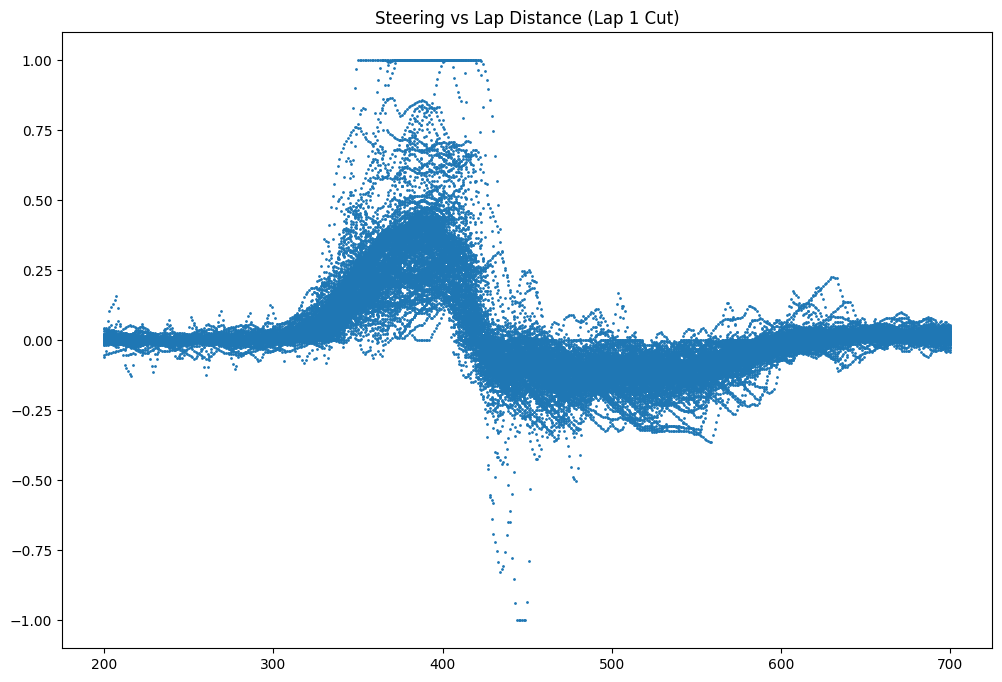

In [19]:
plt.figure(figsize=(12, 8))
a = lap_1_cut[(lap_1_cut["M_LAPDISTANCE_1"] >= 200) & (lap_1_cut["M_LAPDISTANCE_1"] <= 700)]
plt.scatter(x = a["M_LAPDISTANCE_1"], y = a["M_STEER_1"], s = 1)
plt.title("Steering vs Lap Distance (Lap 1 Cut)")
plt.show()

In [20]:
print(
    f"Total 1st laps: {len(lap_1_cut[['M_SESSIONUID', 'M_CURRENTLAPNUM']].drop_duplicates())}",
    f"Total n>1 laps: {len(lap_n_cut[['M_SESSIONUID', 'M_CURRENTLAPNUM']].drop_duplicates())}",
    sep="\n"
)


Total 1st laps: 187
Total n>1 laps: 276
